<a href="https://colab.research.google.com/github/eclemente27/eclemente-data2000/blob/main/HW_11_14_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Image Classification: Fashion MNIST

The Fashion MNIST dataset is a large freely available database of fashion images that is commonly used for training and testing various machine learning systems. Fashion-MNIST was intended to serve as a replacement for the original MNIST database for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.

The dataset contains 70,000 28x28 grayscale images of fashion products from 10 categories from a dataset of Zalando article images, with 7,000 images per category. The training set consists of 60,000 images and the test set consists of 10,000 images. The dataset is commonly included in standard machine learning libraries. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Fashion_MNIST))

The classes are:

| Label | Description |
|-----|-----|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## Objective

The goal here is to simply build and fit the best convolutional neural network that you can to correctly classify these image instances. Describe your process and choices as you go, and include an evaluation of your model's performance.

In [38]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


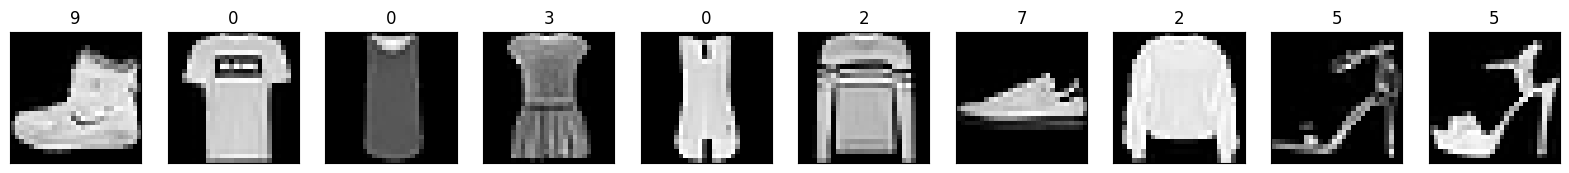

In [39]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i])
    plt.title(f'{y_train[i]}')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [40]:
img_input = tf.keras.layers.Input(shape = (28,28,1))

#RGB max is 255 min is 0

In [41]:
conv1 = layers.Conv2D(7,2,activation = 'relu')(img_input) #0 for negative, to infinity for positive
pooling = layers.AveragePooling2D(2)(conv1) #takes avg value of pool, the
#dimension is the shape of your data, what are you trying to model?
#4 is the window length
#stride=1 as the default
dropout=tf.keras.layers.Dropout(0.4)(pooling)
#40% of neurons will be set to 0(randomly)60% are active
flatten=tf.keras.layers.Flatten()(dropout)

dense=layers.Dense(100 ,activation ='relu')(flatten)

output = layers.Dense(10, activation='softmax')(dense)

In [42]:
model = tf.keras.Model(img_input, output)

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
y_train = pd.get_dummies(data = y_train)
y_test =pd.get_dummies(data = y_test)

# **Fit the model**

In [47]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.4302 - accuracy: 0.8449 - val_loss: 0.3805 - val_accuracy: 0.8652
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3899 - accuracy: 0.8579 - val_loss: 0.3521 - val_accuracy: 0.8746
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3671 - accuracy: 0.8644 - val_loss: 0.3395 - val_accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3489 - accuracy: 0.8724 - val_loss: 0.3343 - val_accuracy: 0.8742
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3329 - accuracy: 0.8774 - val_loss: 0.3120 - val_accuracy: 0.8876


# **Evaluate Model's Performance**

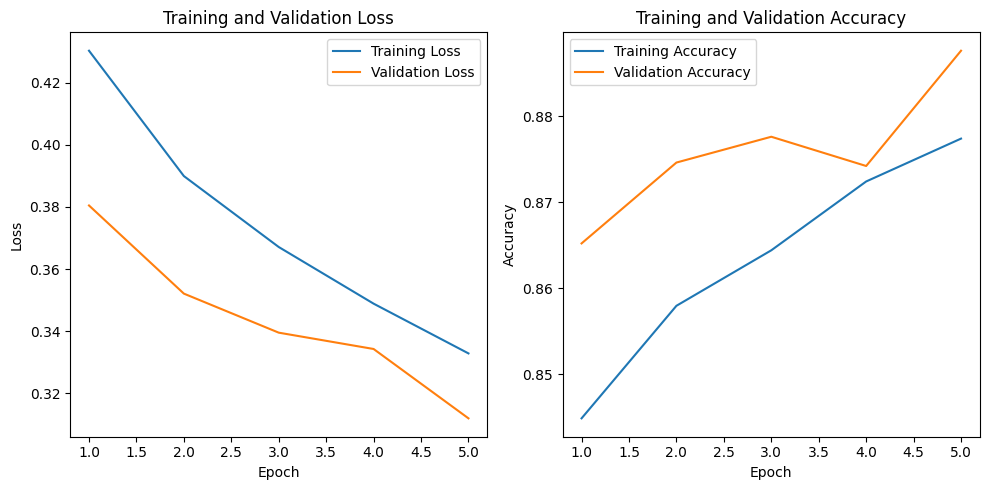

In [52]:
import matplotlib.pyplot as plt

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Evaluate the Model**

In [53]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Loss: {evaluation[0]}')
print(f'Test Accuracy: {evaluation[1]}')


313/313 [==============================] - 2s 6ms/step - loss: 0.3399 - accuracy: 0.8713
Test Loss: 0.3398907482624054
Test Accuracy: 0.8712999820709229


The model is overfitting since the training loss is higher than validation model. Even though it is decreasing it is getting more accurate. The accuracy is 87% so there can still be improvements. Improvements to the data could be normalizing and standardizing more. Another option is to do cross validation to get a better estimate of the model's performance and how it reacts to new data.